In [1]:
from sklearn.datasets import make_regression

In [3]:
import numpy as np

In [5]:
X,y = make_regression(n_samples=4,n_features=1,n_informative=1,n_targets=1,noise=80,random_state=13)

In [7]:
import matplotlib.pyplot as plt

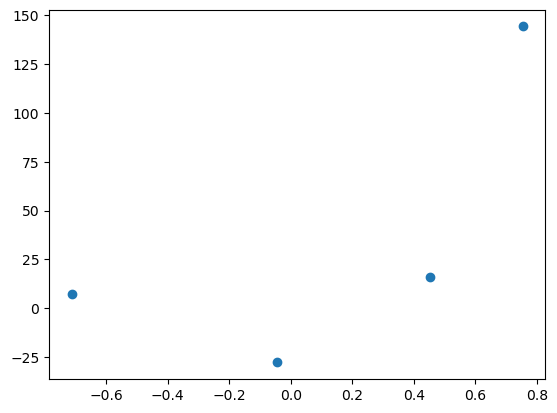

In [11]:
plt.scatter(X,y)

In [13]:
# OLS

from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [17]:
lr.fit(X,y)

LinearRegression()

In [19]:
lr.coef_

array([78.35063668])

In [21]:
lr.intercept_

26.15963284313262

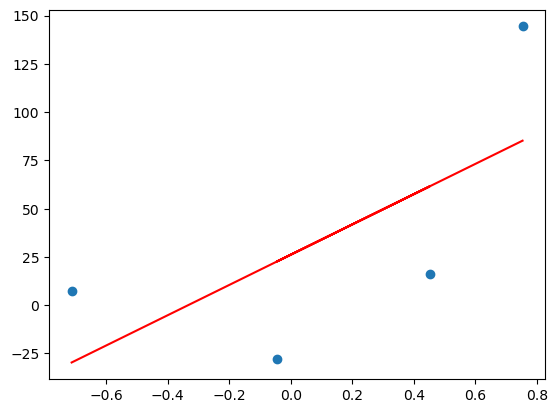

In [27]:
plt.scatter(X,y)
plt.plot(X,lr.predict(X),color='red')

In [29]:
# lets apply assuming slope is m = 78.35
# starting value b =0
y_pred = ((78.35 * X) + 0).reshape(4)

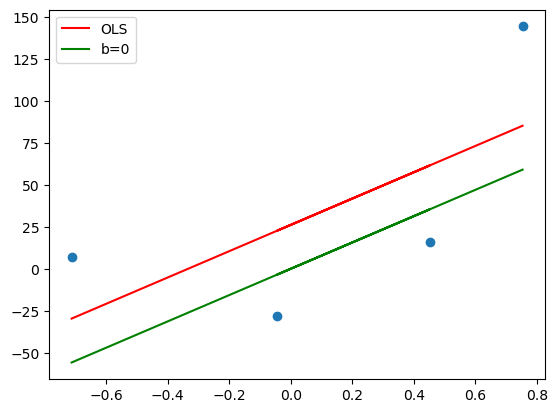

In [33]:
plt.scatter(X,y)
plt.plot(X,lr.predict(X),color='red',label='OLS')
plt.plot(X,y_pred,color='green',label='b=0')
plt.legend()
plt.show()

In [51]:
m = 78.35
b = 0
loss_slope = -2 * np.sum(y - m*X.ravel() + b)
loss_slope

-209.27763408209216

In [53]:
l_rate = 0.1
step_size = l_rate * loss_slope
step_size

-20.927763408209216

In [55]:
# calculation new intercept
b = b - step_size
b


20.927763408209216

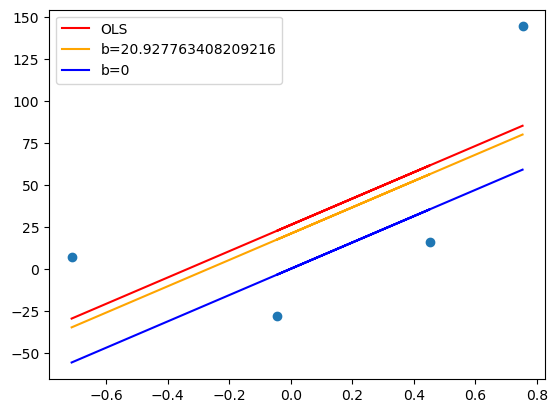

In [69]:
y_pred1 = ((m * X.ravel()) + b).reshape(4)

plt.scatter(X,y)
plt.plot(X,lr.predict(X),color='red',label='OLS')
plt.plot(X,y_pred1,color='orange',label='b={}'.format(b))
plt.plot(X,y_pred,color='blue',label='b=0')
plt.legend()
plt.show()

In [71]:
# Iteration 2
loss_slope = -2 * np.sum(y - m*X.ravel() - b)
loss_slope

-41.85552681641843

In [73]:
step_size = loss_slope * l_rate
step_size

-4.185552681641844

In [75]:
b = b- step_size
b

25.11331608985106

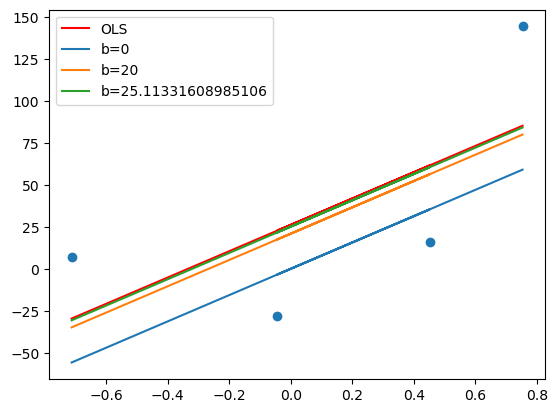

In [81]:
y_pred2 = ((m*X.ravel()) + b).reshape(4)


plt.scatter(X,y)
plt.plot(X,lr.predict(X),color='red',label='OLS')
plt.plot(X,y_pred,label='b=0')
plt.plot(X,y_pred1,label='b=20')
plt.plot(X,y_pred2,label='b={}'.format(b))
plt.legend()
plt.show()

# Writing all of this within a loop

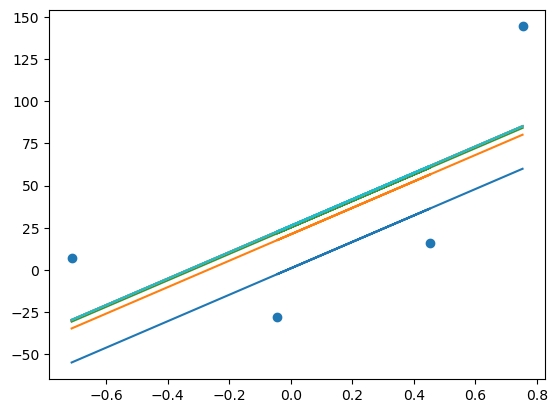

In [93]:
m = 78.35
b = -100
lr = 0.1
epochs = 10
for i in range(epochs):
    loss_slope = -2 * np.sum(y - m*X.ravel() - b)
    step_size = loss_slope*lr

    b = b - step_size
    y_pred = m*X + b
    plt.plot(X,y_pred)

plt.scatter(X,y)